##### Shallow Neural Network: 
   * Typically consists of an input layer, one hidden layer, and an output layer.
   
   * Generally faster to train due to fewer parameters.
   
   * Suitable for simpler tasks where the relationship between inputs and outputs is relatively straightforward.
   
   * Faster training, less computationally intensive.
   
   * Simple tasks such as linear regression, basic classification problems.

##### Deep Neural Network:
   * Composed of an input layer, multiple hidden layers (ranging from a few to dozens or even hundreds), and an output layer.
   
   * Requires more computational resources and time to train due to the higher number of parameters. Techniques such as backpropagation, gradient descent, and various optimization algorithms are used to train these networks.
   
   * Suitable for complex tasks such as image and speech recognition, natural language processing, and other applications where the relationships between inputs and outputs are highly non-linear and complex.
   
   * Longer training times, more computationally intensive, often requiring GPUs or TPUs.
   
   * Advanced tasks like image recognition (using Convolutional Neural Networks), language translation (using Recurrent Neural Networks), and more.

### Design, train, and evaluate a shallow neural network using TensorFlow:

* 1). Generate the Dataset
* 2). Prepocess Data
* 3). Design the Neural Network
* 4). Compile the Model
* 5). Train the Model
* 6). Evaluate the Model

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#### Step 1: Generate random data

In [2]:
np.random.seed(1234)
X = np.random.rand(2000, 3)
# y = np.random.randint(2, size=2000)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target variable

In [3]:
X[:5]

array([[0.19151945, 0.62210877, 0.43772774],
       [0.78535858, 0.77997581, 0.27259261],
       [0.27646426, 0.80187218, 0.95813935],
       [0.87593263, 0.35781727, 0.50099513],
       [0.68346294, 0.71270203, 0.37025075]])

In [4]:
y[:10]

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

#### Step 2: Prepocess Data ; Split the data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(1600, 3)
(400, 3)
(1600,)
(400,)


#### Step 3: Design the Shallow neural network

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(1, activation='sigmoid')])

C:\Users\saura\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Step 4: Compile the model

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Step 5: Train the model and monitor the training process

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4569 - loss: 0.6961 - val_accuracy: 0.4812 - val_loss: 0.6794
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5767 - loss: 0.6620 - val_accuracy: 0.5719 - val_loss: 0.6558
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6215 - loss: 0.6438 - val_accuracy: 0.6781 - val_loss: 0.6331
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6821 - loss: 0.6173 - val_accuracy: 0.7250 - val_loss: 0.6117
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7491 - loss: 0.5933 - val_accuracy: 0.7656 - val_loss: 0.5895
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 0.5708 - val_accuracy: 0.7781 - val_loss: 0.5684
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8014 - loss: 0.5566 - val_accuracy: 0.7875 - val_loss: 0.5477
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8043 - loss: 0.5401 - val_accuracy: 0.8125 - val_loss

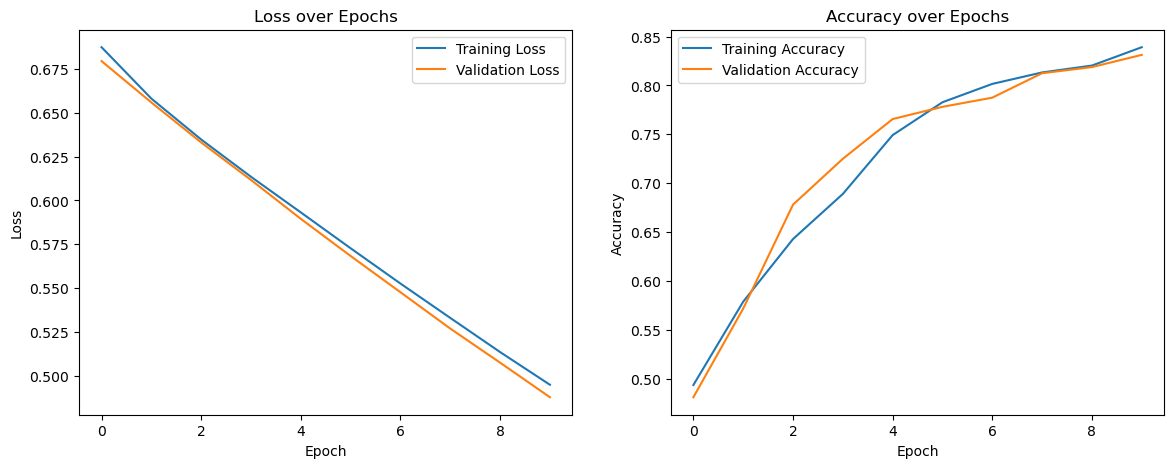

In [10]:
# Plot the loss and accuracy over epochs
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Step 6: Evaluate the model on the testing dataset

In [11]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [13]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.8175
Precision: 0.7405
Recall: 0.9749
F1-Score: 0.8416


### Design, train, and evaluate a Deep neural network using TensorFlow:

#### Step 3: Design the Deep neural network

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#### Step 4: Compile the model

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Step 5: Train the model and monitor the training process

In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5154 - loss: 0.7009 - val_accuracy: 0.7125 - val_loss: 0.6763
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7376 - loss: 0.6665 - val_accuracy: 0.7750 - val_loss: 0.6415
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7689 - loss: 0.6313 - val_accuracy: 0.7875 - val_loss: 0.6051
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8043 - loss: 0.5872 - val_accuracy: 0.8281 - val_loss: 0.5504
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8192 - loss: 0.5368 - val_accuracy: 0.8687 - val_loss: 0.4886
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8604 - loss: 0.4701 - val_accuracy: 0.8781 - val_loss: 0.4131
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8805 - loss: 0.3923 - val_accuracy: 0.8906 - val_loss: 0.3441
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8796 - loss: 0.3398 - val_accuracy: 0.9281 - val_loss

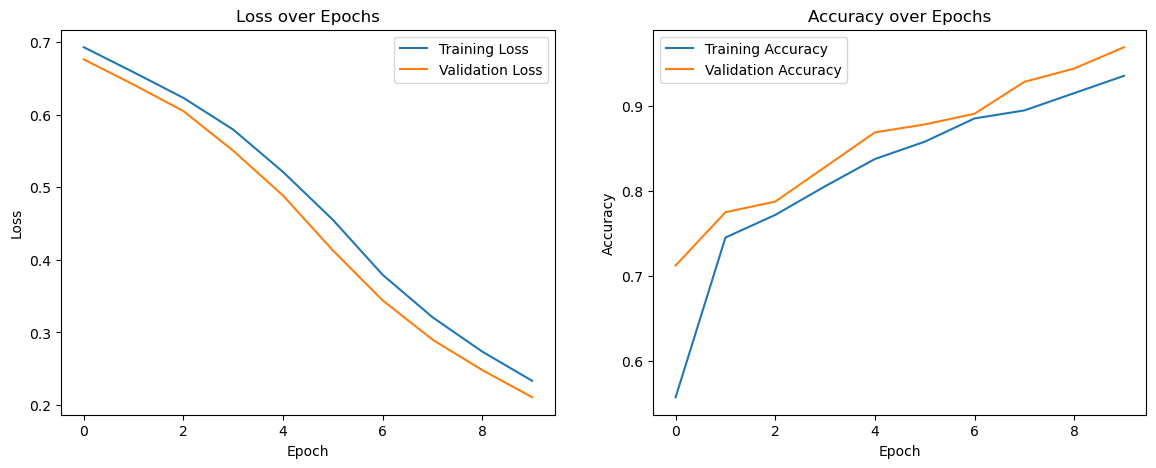

In [17]:
# Plot the loss and accuracy over epochs
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Step 6: Evaluate the model on the testing dataset

In [18]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [20]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.9550
Precision: 0.9458
Recall: 0.9648
F1-Score: 0.9552
